Problem 1

In [30]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io
for data_name in ["mnist", "spam", "cifar10"]:
    
    data = io.loadmat("data/%s_data.mat" % data_name)
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


\pagebreak

Problem 2:

In [31]:
mnist = io.loadmat("data/mnist_data.mat")
spam = io.loadmat("data/spam_data.mat")
cifar10 = io.loadmat("data/cifar10_data.mat")

In [32]:
def train_val_split(data, split_val):
    np.random.seed(42)
    np.random.shuffle(data)
    train = data[:split_val]
    validation = data[split_val:]
    return train, validation

In [33]:
mnist_train, mnist_validation = train_val_split(mnist['training_data'], 50000)
mnist_train_labels, mnist_validation_labels = train_val_split(mnist['training_labels'], 50000)

spam_train, spam_validation = train_val_split(spam['training_data'], 5172 - 5172//5)
spam_train_labels, spam_validation_labels = train_val_split(spam['training_labels'], 5172 - 5172//5)

cifar10_train, cifar10_validation = train_val_split(cifar10['training_data'], 45000)
cifar10_train_labels, cifar10_validation_labels = train_val_split(cifar10['training_labels'], 45000)
#run this cell once

\pagebreak

Problem 3:

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
def train_examples(train, labels, size, model):
    train_example = train[:size]
    labels_example = np.ravel(labels[:size])
    model.fit(train_example, labels_example)
    prediction = model.predict(train_example)
    return accuracy_score(labels_example, prediction)

In [36]:
example_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
mnist_train_accuracies = []
mnist_validation_accuracies = []
for size in example_sizes:
    mnist_model = svm.SVC(kernel='linear')
    
    train_accuracy = train_examples(mnist_train, mnist_train_labels, size, mnist_model)
    mnist_train_accuracies = np.append(mnist_train_accuracies, train_accuracy)
    
    mnist_validation_pred = mnist_model.predict(mnist_validation)
    mnist_validation_acc = accuracy_score(mnist_validation_labels, mnist_validation_pred)
    mnist_validation_accuracies = np.append(mnist_validation_accuracies, mnist_validation_acc)
    
print(mnist_train_accuracies)
print(mnist_validation_accuracies)

[1. 1. 1. 1. 1. 1. 1.]
[0.7814 0.8386 0.8622 0.8809 0.895  0.9052 0.9119]


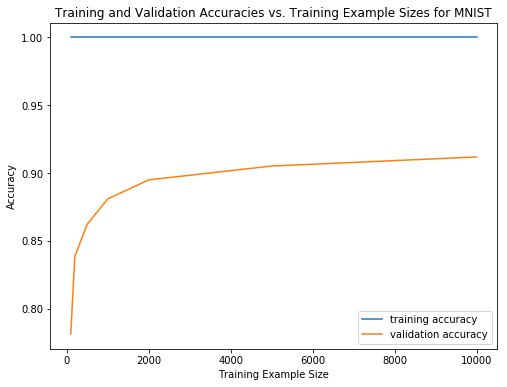

In [37]:
plt.figure(figsize=(8,6))
plt.plot(example_sizes, mnist_train_accuracies, label="training accuracy")
plt.plot(example_sizes, mnist_validation_accuracies, label="validation accuracy")
plt.legend()
plt.title("Training and Validation Accuracies vs. Training Example Sizes for MNIST")
plt.xlabel('Training Example Size')
plt.ylabel('Accuracy');

In [38]:
spam_example_sizes = [100, 200, 500, 1000, 2000, len(spam_train)]
spam_train_accuracies = []
spam_validation_accuracies = []
for size in spam_example_sizes:
    spam_model = svm.SVC(kernel='linear')
    
    train_accuracy = train_examples(spam_train, spam_train_labels, size, spam_model)
    spam_train_accuracies = np.append(spam_train_accuracies, train_accuracy)
    
    spam_validation_pred = spam_model.predict(spam_validation)
    spam_validation_acc = accuracy_score(spam_validation_labels, spam_validation_pred)
    spam_validation_accuracies = np.append(spam_validation_accuracies, spam_validation_acc)
    
print(spam_train_accuracies)
print(spam_validation_accuracies)

[0.87      0.84      0.814     0.801     0.7975    0.7962784]
[0.7794971  0.81431335 0.82978723 0.81914894 0.82205029 0.82301741]


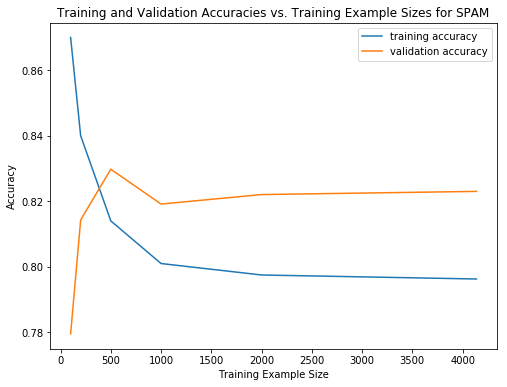

In [39]:
plt.figure(figsize=(8,6))
plt.plot(spam_example_sizes, spam_train_accuracies, label="training accuracy")
plt.plot(spam_example_sizes, spam_validation_accuracies, label="validation accuracy")
plt.legend()
plt.title("Training and Validation Accuracies vs. Training Example Sizes for SPAM")
plt.xlabel('Training Example Size')
plt.ylabel('Accuracy');

In [40]:
cifar10_example_sizes = [100, 200, 500, 1000, 2000, 5000]
cifar10_train_accuracies = []
cifar10_validation_accuracies = []
for size in cifar10_example_sizes:
    cifar10_model = svm.SVC(kernel='linear') 
    
    train_accuracy = train_examples(cifar10_train, cifar10_train_labels, size, cifar10_model)
    cifar10_train_accuracies = np.append(cifar10_train_accuracies, train_accuracy)
    
    cifar10_validation_pred = cifar10_model.predict(cifar10_validation)
    cifar10_validation_acc = accuracy_score(cifar10_validation_labels, cifar10_validation_pred)
    cifar10_validation_accuracies = np.append(cifar10_validation_accuracies, cifar10_validation_acc)
    
print(cifar10_train_accuracies)
print(cifar10_validation_accuracies)

[1. 1. 1. 1. 1. 1.]
[0.2206 0.2546 0.2714 0.2826 0.3044 0.309 ]


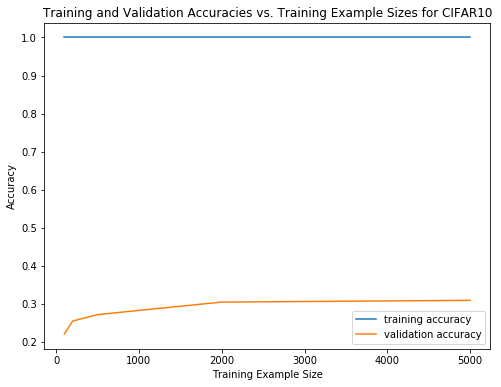

In [41]:
plt.figure(figsize=(8,6))
plt.plot(cifar10_example_sizes, cifar10_train_accuracies, label="training accuracy")
plt.plot(cifar10_example_sizes, cifar10_validation_accuracies, label="validation accuracy")
plt.legend()
plt.title("Training and Validation Accuracies vs. Training Example Sizes for CIFAR10")
plt.xlabel('Training Example Size')
plt.ylabel('Accuracy');

\pagebreak

Problem 4

In [42]:
hyper_param_example_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
mnist_train_param_accuracies = []
mnist_validation_param_accuracies = []
for size in hyper_param_example_sizes:
    mnist_param_model = svm.SVC(kernel='linear', C=.1)
    
    train_accuracy = train_examples(mnist_train, mnist_train_labels, size, mnist_param_model)
    mnist_train_param_accuracies = np.append(mnist_train_param_accuracies, train_accuracy)
    
    mnist_validation_pred = mnist_param_model.predict(mnist_validation)
    mnist_validation_acc = accuracy_score(mnist_validation_labels, mnist_validation_pred)
    mnist_validation_param_accuracies = np.append(mnist_validation_param_accuracies, mnist_validation_acc)
    
print(mnist_train_param_accuracies)
print(mnist_validation_param_accuracies)

[1. 1. 1. 1. 1. 1. 1.]
[0.7814 0.8386 0.8622 0.8809 0.895  0.9052 0.9119]


In [43]:
hyper_param_example_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
mnist_train_param_accuracies = []
mnist_validation_param_accuracies = []
for size in hyper_param_example_sizes:
    mnist_param_model = svm.SVC(kernel='linear', C=.0000001)
    
    train_accuracy = train_examples(mnist_train, mnist_train_labels, size, mnist_param_model)
    mnist_train_param_accuracies = np.append(mnist_train_param_accuracies, train_accuracy)
    
    mnist_validation_pred = mnist_param_model.predict(mnist_validation)
    mnist_validation_acc = accuracy_score(mnist_validation_labels, mnist_validation_pred)
    mnist_validation_param_accuracies = np.append(mnist_validation_param_accuracies, mnist_validation_acc)
    
print(mnist_train_param_accuracies)
print(mnist_validation_param_accuracies)

[0.76   0.89   0.906  0.909  0.924  0.9328 0.9373]
[0.5357 0.7529 0.8421 0.8751 0.8903 0.911  0.9201]


In [44]:
hyper_param_example_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
mnist_train_param_accuracies = []
mnist_validation_param_accuracies = []
for size in hyper_param_example_sizes:
    mnist_param_model = svm.SVC(kernel='linear', C=1000000)
    
    train_accuracy = train_examples(mnist_train, mnist_train_labels, size, mnist_param_model)
    mnist_train_param_accuracies = np.append(mnist_train_param_accuracies, train_accuracy)
    
    mnist_validation_pred = mnist_param_model.predict(mnist_validation)
    mnist_validation_acc = accuracy_score(mnist_validation_labels, mnist_validation_pred)
    mnist_validation_param_accuracies = np.append(mnist_validation_param_accuracies, mnist_validation_acc)
    
print(mnist_train_param_accuracies)
print(mnist_validation_param_accuracies)

[1. 1. 1. 1. 1. 1. 1.]
[0.7814 0.8386 0.8622 0.8809 0.895  0.9052 0.9119]


In [45]:
hyper_param_example_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
mnist_train_param_accuracies = []
mnist_validation_param_accuracies = []
for size in hyper_param_example_sizes:
    mnist_param_model = svm.SVC(kernel='linear', C=.000000001)
    
    train_accuracy = train_examples(mnist_train, mnist_train_labels, size, mnist_param_model)
    mnist_train_param_accuracies = np.append(mnist_train_param_accuracies, train_accuracy)
    
    mnist_validation_pred = mnist_param_model.predict(mnist_validation)
    mnist_validation_acc = accuracy_score(mnist_validation_labels, mnist_validation_pred)
    mnist_validation_param_accuracies = np.append(mnist_validation_param_accuracies, mnist_validation_acc)
    
print(mnist_train_param_accuracies)
print(mnist_validation_param_accuracies)

[0.13   0.13   0.12   0.113  0.1095 0.302  0.6671]
[0.0971 0.1005 0.0971 0.1005 0.1038 0.2951 0.6691]


In [46]:
hyper_param_example_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
mnist_train_param_accuracies = []
mnist_validation_param_accuracies = []
for size in hyper_param_example_sizes:
    mnist_param_model = svm.SVC(kernel='linear', C=.00000001)
    
    train_accuracy = train_examples(mnist_train, mnist_train_labels, size, mnist_param_model)
    mnist_train_param_accuracies = np.append(mnist_train_param_accuracies, train_accuracy)
    
    mnist_validation_pred = mnist_param_model.predict(mnist_validation)
    mnist_validation_acc = accuracy_score(mnist_validation_labels, mnist_validation_pred)
    mnist_validation_param_accuracies = np.append(mnist_validation_param_accuracies, mnist_validation_acc)
    
print(mnist_train_param_accuracies)
print(mnist_validation_param_accuracies)

[0.13   0.13   0.306  0.62   0.7985 0.8748 0.8975]
[0.0971 0.1005 0.2781 0.5981 0.7902 0.8677 0.8888]


In [51]:
hyper_param_example_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
mnist_train_param_accuracies = []
mnist_validation_param_accuracies = []
for size in hyper_param_example_sizes:
    mnist_param_model = svm.SVC(kernel='linear', C=.000001)
    
    train_accuracy = train_examples(mnist_train, mnist_train_labels, size, mnist_param_model)
    mnist_train_param_accuracies = np.append(mnist_train_param_accuracies, train_accuracy)
    
    mnist_validation_pred = mnist_param_model.predict(mnist_validation)
    mnist_validation_acc = accuracy_score(mnist_validation_labels, mnist_validation_pred)
    mnist_validation_param_accuracies = np.append(mnist_validation_param_accuracies, mnist_validation_acc)
    
print(mnist_train_param_accuracies)
print(mnist_validation_param_accuracies)

[1.     1.     0.998  0.992  0.983  0.9752 0.9678]
[0.7816 0.8386 0.864  0.8845 0.9033 0.9182 0.9297]


In [48]:
hyper_param_example_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
mnist_train_param_accuracies = []
mnist_validation_param_accuracies = []
for size in hyper_param_example_sizes:
    mnist_param_model = svm.SVC(kernel='linear', C=.00001)
    
    train_accuracy = train_examples(mnist_train, mnist_train_labels, size, mnist_param_model)
    mnist_train_param_accuracies = np.append(mnist_train_param_accuracies, train_accuracy)
    
    mnist_validation_pred = mnist_param_model.predict(mnist_validation)
    mnist_validation_acc = accuracy_score(mnist_validation_labels, mnist_validation_pred)
    mnist_validation_param_accuracies = np.append(mnist_validation_param_accuracies, mnist_validation_acc)
    
print(mnist_train_param_accuracies)
print(mnist_validation_param_accuracies)

[1.     1.     1.     1.     1.     0.9994 0.9959]
[0.7814 0.8386 0.8622 0.8809 0.8947 0.9053 0.9178]


In [49]:
hyper_param_example_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
mnist_train_param_accuracies = []
mnist_validation_param_accuracies = []
for size in hyper_param_example_sizes:
    mnist_param_model = svm.SVC(kernel='linear', C=.000005)
    
    train_accuracy = train_examples(mnist_train, mnist_train_labels, size, mnist_param_model)
    mnist_train_param_accuracies = np.append(mnist_train_param_accuracies, train_accuracy)
    
    mnist_validation_pred = mnist_param_model.predict(mnist_validation)
    mnist_validation_acc = accuracy_score(mnist_validation_labels, mnist_validation_pred)
    mnist_validation_param_accuracies = np.append(mnist_validation_param_accuracies, mnist_validation_acc)
    
print(mnist_train_param_accuracies)
print(mnist_validation_param_accuracies)

[1.     1.     1.     1.     0.9995 0.997  0.9903]
[0.7814 0.8386 0.8622 0.8809 0.8947 0.9071 0.9207]


In [50]:
hyper_param_example_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
mnist_train_param_accuracies = []
mnist_validation_param_accuracies = []
for size in hyper_param_example_sizes:
    mnist_param_model = svm.SVC(kernel='linear', C=.000002)
    
    train_accuracy = train_examples(mnist_train, mnist_train_labels, size, mnist_param_model)
    mnist_train_param_accuracies = np.append(mnist_train_param_accuracies, train_accuracy)
    
    mnist_validation_pred = mnist_param_model.predict(mnist_validation)
    mnist_validation_acc = accuracy_score(mnist_validation_labels, mnist_validation_pred)
    mnist_validation_param_accuracies = np.append(mnist_validation_param_accuracies, mnist_validation_acc)
    
print(mnist_train_param_accuracies)
print(mnist_validation_param_accuracies)

[1.     1.     1.     1.     0.996  0.987  0.9782]
[0.7814 0.839  0.8628 0.8827 0.8997 0.9149 0.9245]


In [52]:
print('''C values tried and the respective validation accuracies when trained on different training 
example sizes up to 10,000 for MNIST: ''')
print()
print('''C = .1: 
[0.7814 0.8386 0.8622 0.8809 0.895  0.9052 0.9119]''')
print()
print('''C = 0000001: 
      [0.5357 0.7529 0.8421 0.8751 0.8903 0.911  0.9201]''')
print()
print('''C = 1000000: 
      [0.7814 0.8386 0.8622 0.8809 0.895  0.9052 0.9119]''')
print()
print('''C = .000000001: 
      [0.0971 0.1005 0.0971 0.1005 0.1038 0.2951 0.6691]''')
print()
print('''C = .00000001: 
      [0.0971 0.1005 0.2781 0.5981 0.7902 0.8677 0.8888]''')
print()
print('''C = .000001: 
      [0.7816 0.8386 0.864  0.8845 0.9033 0.9182 0.9297]''')
print()
print('''C = .00001: 
      [0.7814 0.8386 0.8622 0.8809 0.8947 0.9053 0.9178]''')
print()
print('''C = .000005: 
      [0.7814 0.8386 0.8622 0.8809 0.8947 0.9071 0.9207]''')
print()
print('''C=.000002: 
      [0.7814 0.839  0.8628 0.8827 0.8997 0.9149 0.9245]''')
print()
print('The best value of C found was .000001, with validation accuracy of .9297 when trained on 10,000 samples.')

C values tried and the respective validation accuracies when trained on different training 
example sizes up to 10,000 for MNIST: 

C = .1: 
[0.7814 0.8386 0.8622 0.8809 0.895  0.9052 0.9119]

C = 0000001: 
      [0.5357 0.7529 0.8421 0.8751 0.8903 0.911  0.9201]

C = 1000000: 
      [0.7814 0.8386 0.8622 0.8809 0.895  0.9052 0.9119]

C = .000000001: 
      [0.0971 0.1005 0.0971 0.1005 0.1038 0.2951 0.6691]

C = .00000001: 
      [0.0971 0.1005 0.2781 0.5981 0.7902 0.8677 0.8888]

C = .000001: 
      [0.7816 0.8386 0.864  0.8845 0.9033 0.9182 0.9297]

C = .00001: 
      [0.7814 0.8386 0.8622 0.8809 0.8947 0.9053 0.9178]

C = .000005: 
      [0.7814 0.8386 0.8622 0.8809 0.8947 0.9071 0.9207]

C=.000002: 
      [0.7814 0.839  0.8628 0.8827 0.8997 0.9149 0.9245]

The best value of C found was .000001, with validation accuracy of .9297 when trained on 10,000 samples.


\pagebreak

Problem 5

In [53]:
def k_fold_validate(train_data, labels, k):
    np.random.seed(42)
    np.random.shuffle(train_data)
    np.random.seed(42)
    np.random.shuffle(labels)
    split_train = np.array_split(train_data, k)
    split_labels = np.array_split(labels, k)
    return split_train, split_labels

In [54]:
k5_spam_train, k5_spam_labels = k_fold_validate(spam['training_data'], spam['training_labels'], 5)
#run this cell once

In [55]:
k5_accuracy = []
for i in np.arange(5):
    validation = k5_spam_train[i]
    validation_labels = k5_spam_labels[i]
    k5_train = []
    k5_labels = []
    for j in np.arange(5):
        if j != i:
            if len(k5_train) == 0:
                k5_train = k5_spam_train[j]
                k5_labels = k5_spam_labels[j]
            else:
                k5_train = np.concatenate((k5_train, k5_spam_train[j]))
                k5_labels = np.concatenate((k5_labels, k5_spam_labels[j]))
    k5_model = svm.SVC(kernel='linear')
    k5_model.fit(k5_train, np.ravel(k5_labels))
    k5_prediction = k5_model.predict(validation)
    k5_acc = accuracy_score(validation_labels, k5_prediction)
    k5_accuracy = np.append(k5_accuracy, k5_acc)
avg_k5_accuracy = np.mean(k5_accuracy)
avg_k5_accuracy

0.803177005952214

In [56]:
k5_accuracy = []
for i in np.arange(5):
    validation = k5_spam_train[i]
    validation_labels = k5_spam_labels[i]
    k5_train = []
    k5_labels = []
    for j in np.arange(5):
        if j != i:
            if len(k5_train) == 0:
                k5_train = k5_spam_train[j]
                k5_labels = k5_spam_labels[j]
            else:
                k5_train = np.concatenate((k5_train, k5_spam_train[j]))
                k5_labels = np.concatenate((k5_labels, k5_spam_labels[j]))
    k5_model = svm.SVC(kernel='linear', C=.1)
    k5_model.fit(k5_train, np.ravel(k5_labels))
    k5_prediction = k5_model.predict(validation)
    k5_acc = accuracy_score(validation_labels, k5_prediction)
    k5_accuracy = np.append(k5_accuracy, k5_acc)
avg_k5_accuracy = np.mean(k5_accuracy)
avg_k5_accuracy

0.7940900213980695

In [57]:
k5_accuracy = []
for i in np.arange(5):
    validation = k5_spam_train[i]
    validation_labels = k5_spam_labels[i]
    k5_train = []
    k5_labels = []
    for j in np.arange(5):
        if j != i:
            if len(k5_train) == 0:
                k5_train = k5_spam_train[j]
                k5_labels = k5_spam_labels[j]
            else:
                k5_train = np.concatenate((k5_train, k5_spam_train[j]))
                k5_labels = np.concatenate((k5_labels, k5_spam_labels[j]))
    k5_model = svm.SVC(kernel='linear', C=.001)
    k5_model.fit(k5_train, np.ravel(k5_labels))
    k5_prediction = k5_model.predict(validation)
    k5_acc = accuracy_score(validation_labels, k5_prediction)
    k5_accuracy = np.append(k5_accuracy, k5_acc)
avg_k5_accuracy = np.mean(k5_accuracy)
avg_k5_accuracy

0.7517472598323662

In [58]:
k5_accuracy = []
for i in np.arange(5):
    validation = k5_spam_train[i]
    validation_labels = k5_spam_labels[i]
    k5_train = []
    k5_labels = []
    for j in np.arange(5):
        if j != i:
            if len(k5_train) == 0:
                k5_train = k5_spam_train[j]
                k5_labels = k5_spam_labels[j]
            else:
                k5_train = np.concatenate((k5_train, k5_spam_train[j]))
                k5_labels = np.concatenate((k5_labels, k5_spam_labels[j]))
    k5_model = svm.LinearSVC(C=100000)
    k5_model.fit(k5_train, np.ravel(k5_labels))
    k5_prediction = k5_model.predict(validation)
    k5_acc = accuracy_score(validation_labels, k5_prediction)
    k5_accuracy = np.append(k5_accuracy, k5_acc)
avg_k5_accuracy = np.mean(k5_accuracy)
avg_k5_accuracy

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7836483241293601

In [59]:
k5_accuracy = []
for i in np.arange(5):
    validation = k5_spam_train[i]
    validation_labels = k5_spam_labels[i]
    k5_train = []
    k5_labels = []
    for j in np.arange(5):
        if j != i:
            if len(k5_train) == 0:
                k5_train = k5_spam_train[j]
                k5_labels = k5_spam_labels[j]
            else:
                k5_train = np.concatenate((k5_train, k5_spam_train[j]))
                k5_labels = np.concatenate((k5_labels, k5_spam_labels[j]))
    k5_model = svm.LinearSVC(C=1000)
    k5_model.fit(k5_train, np.ravel(k5_labels))
    k5_prediction = k5_model.predict(validation)
    k5_acc = accuracy_score(validation_labels, k5_prediction)
    k5_accuracy = np.append(k5_accuracy, k5_acc)
avg_k5_accuracy = np.mean(k5_accuracy)
avg_k5_accuracy

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7519236771040656

In [60]:
k5_accuracy = []
for i in np.arange(5):
    validation = k5_spam_train[i]
    validation_labels = k5_spam_labels[i]
    k5_train = []
    k5_labels = []
    for j in np.arange(5):
        if j != i:
            if len(k5_train) == 0:
                k5_train = k5_spam_train[j]
                k5_labels = k5_spam_labels[j]
            else:
                k5_train = np.concatenate((k5_train, k5_spam_train[j]))
                k5_labels = np.concatenate((k5_labels, k5_spam_labels[j]))
    k5_model = svm.LinearSVC(C=100)
    k5_model.fit(k5_train, np.ravel(k5_labels))
    k5_prediction = k5_model.predict(validation)
    k5_acc = accuracy_score(validation_labels, k5_prediction)
    k5_accuracy = np.append(k5_accuracy, k5_acc)
avg_k5_accuracy = np.mean(k5_accuracy)
avg_k5_accuracy

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8227026976518189

In [61]:
k5_accuracy = []
for i in np.arange(5):
    validation = k5_spam_train[i]
    validation_labels = k5_spam_labels[i]
    k5_train = []
    k5_labels = []
    for j in np.arange(5):
        if j != i:
            if len(k5_train) == 0:
                k5_train = k5_spam_train[j]
                k5_labels = k5_spam_labels[j]
            else:
                k5_train = np.concatenate((k5_train, k5_spam_train[j]))
                k5_labels = np.concatenate((k5_labels, k5_spam_labels[j]))
    k5_model = svm.SVC(kernel='linear', C=10)
    k5_model.fit(k5_train, np.ravel(k5_labels))
    k5_prediction = k5_model.predict(validation)
    k5_acc = accuracy_score(validation_labels, k5_prediction)
    k5_accuracy = np.append(k5_accuracy, k5_acc)
avg_k5_accuracy = np.mean(k5_accuracy)
avg_k5_accuracy

0.8047242078509423

In [62]:
print('''C values tried and the respective validation accuracies when trained using 5-fold cross-validation 
on SPAM dataset:''')
print()
print('C = 1:')
print('0.803177005952214')
print()
print('C = .1:')
print('0.7940900213980695')
print()
print('C = .001:')
print('0.7517472598323662')
print('C = 100000')
print('0.7836483241293601')
print()
print('C = 1000:')
print('0.7519236771040656')
print()
print('C = 100:')
print('0.8227026976518189')
print()
print('C = 10:')
print('0.8047242078509423')
print()
print('The best C value found was C = 100, with accuracy of 0.8227026976518189')
print()
print('''For values over 10, LinearSVC was used because the SVC model took longer than 10 minutes to fit the data, 
and since the LinearSVC model did not converge the accuracies were not always repeatable, but still gave a sense 
of the accuracy range in order to see if C values were increasing or decreasing accuracy.''')

C values tried and the respective validation accuracies when trained using 5-fold cross-validation 
on SPAM dataset:

C = 1:
0.803177005952214

C = .1:
0.7940900213980695

C = .001:
0.7517472598323662
C = 100000
0.7836483241293601

C = 1000:
0.7519236771040656

C = 100:
0.8227026976518189

C = 10:
0.8047242078509423

The best C value found was C = 100, with accuracy of 0.8227026976518189

For values over 10, LinearSVC was used because the SVC model took longer than 10 minutes to fit the data, 
and since the LinearSVC model did not converge the accuracies were not always repeatable, but still gave a sense 
of the accuracy range in order to see if C values were increasing or decreasing accuracy.


\pagebreak

Problem 6:

In [63]:
def model_prediction(train_data, train_labels, test_data, model, train_data_size):
    train_accuracy = train_examples(train_data, train_labels, train_data_size, model)
    test_pred = model.predict(test_data)
    return test_pred

In [64]:
mnist_val_prediction = model_prediction(mnist_train, mnist_train_labels, mnist_validation, 
                                         svm.SVC(kernel='linear', C=.000001), 25000)
print(accuracy_score(mnist_validation_labels, mnist_test_prediction))

0.9385


In [111]:
spam_val_prediction = model_prediction(spam_train, spam_train_labels, spam_validation, 
                                        svm.LinearSVC(C=100), len(spam_train))
print(accuracy_score(spam_validation_labels, spam_val_prediction))

0.8278529980657641


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Testing CIFAR10 C values:

In [112]:
cifar10_prediction1 = model_prediction(cifar10_train, cifar10_train_labels, cifar10_validation,
                                      svm.SVC(kernel='linear', C=.000001), 5000)
print(accuracy_score(cifar10_validation_labels, cifar10_prediction1))

0.3556


In [113]:
cifar10_prediction2 = model_prediction(cifar10_train, cifar10_train_labels, cifar10_validation,
                                      svm.SVC(kernel='linear', C=.0000001), 5000)
print(accuracy_score(cifar10_validation_labels, cifar10_prediction2))

0.384


In [114]:
cifar10_prediction3 = model_prediction(cifar10_train, cifar10_train_labels, cifar10_validation,
                                      svm.SVC(kernel='linear', C=100), 5000)
print(accuracy_score(cifar10_validation_labels, cifar10_prediction3))

0.309


In [115]:
cifar10_prediction4 = model_prediction(cifar10_train, cifar10_train_labels, cifar10_validation,
                                      svm.SVC(kernel='linear', C=.00000001), 5000)
print(accuracy_score(cifar10_validation_labels, cifar10_prediction4))

0.3598


In [116]:
cifar10_prediction5 = model_prediction(cifar10_train, cifar10_train_labels, cifar10_validation,
                                      svm.SVC(kernel='linear', C=.00000005), 5000)
print(accuracy_score(cifar10_validation_labels, cifar10_prediction5))

0.3814


In [117]:
cifar10_prediction6 = model_prediction(cifar10_train, cifar10_train_labels, cifar10_validation,
                                      svm.SVC(kernel='linear', C=.0000005), 5000)
print(accuracy_score(cifar10_validation_labels, cifar10_prediction6))

0.368


Test Predictions:

In [118]:
mnist_test_prediction = model_prediction(mnist_train, mnist_train_labels, mnist['test_data'], 
                                         svm.SVC(kernel='linear', C=.000001), 25000)

In [119]:
spam_test_prediction = model_prediction(spam_train, spam_train_labels, spam['test_data'], 
                                        svm.LinearSVC(C=100), len(spam_train))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [120]:
cifar10_test_prediction = model_prediction(cifar10_train, cifar10_train_labels, cifar10['test_data'],
                                      svm.SVC(kernel='linear', C=.0000001), 5000)

In [126]:
import pandas as pd
import numpy as np

def results_to_csv(y_test, name):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv(name + 'submission.csv', index_label='Id')

#from save_csv.py

In [128]:
results_to_csv(mnist_test_prediction, 'mnist')

In [129]:
results_to_csv(spam_test_prediction, 'spam')

In [130]:
results_to_csv(cifar10_test_prediction, 'cifar10')